In [13]:
# ### Importing Libraries
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [14]:
# ### Defining Performance Metrics
# ===============================================
def performance_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

In [17]:
# ### Loading dataset
# ===============================================
data = pd.read_csv("mobile_price.csv")
print("Dataset Shape:", data.shape)
print(data.head())


Dataset Shape: (807, 8)
   Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3  4.0  128.0         6.00           48       13.0           4000   
1      3.4  6.0   64.0         4.50           48       12.0           4000   
2      4.3  4.0    4.0         4.50           64       16.0           4000   
3      4.4  6.0   64.0         6.40           48       15.0           3800   
4      4.5  6.0  128.0         6.18           35       15.0           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999  


In [18]:
# ### Handling Missing Values and displaying basic statistics
# ===============================================
print("\nMissing Values:\n", data.isnull().sum())
data = data.dropna()  # or fillna() if needed
print("\nAfter Handling Missing Values:", data.shape)
print("\nBasic Statistics:\n", data.describe())



Missing Values:
 Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

After Handling Missing Values: (807, 8)

Basic Statistics:
           Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  807.000000  807.000000  807.000000   807.000000   807.000000   
mean     4.112639    5.941760   64.390335     5.620660    47.821561   
std      0.367830    2.056359   53.868626     3.957409    11.155916   
min      2.800000    0.000000    2.000000     2.000000     5.000000   
25%      3.900000    6.000000   32.000000     4.500000    48.000000   
50%      4.100000    6.000000   32.000000     4.770000    48.000000   
75%      4.400000    6.000000   64.000000     6.300000    48.000000   
max      4.800000   12.000000  256.000000    44.000000    64.000000   

        Selfi_Cam  Battery_Power          Price  
count  807.000000     807.000000     807.000000  
mean     8.86864

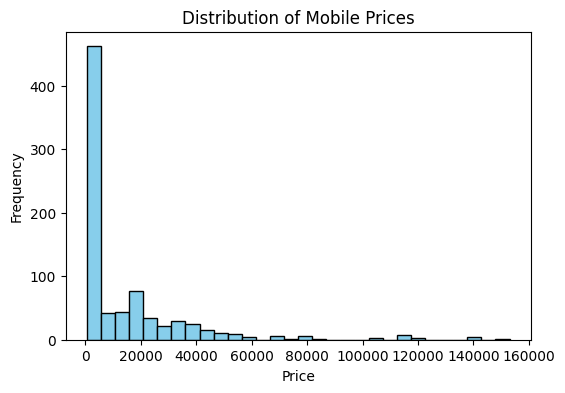

In [20]:
# ### Plotting histogram of target feature
# ===============================================
plt.figure(figsize=(6,4))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Mobile Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

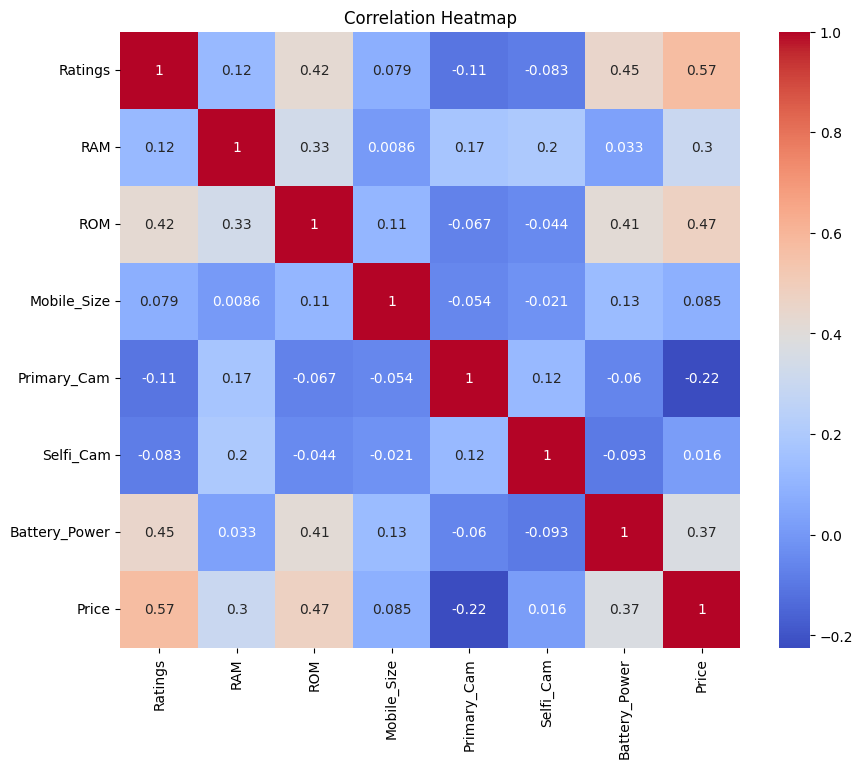

In [21]:
# ### Plotting correlation map
# ===============================================
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

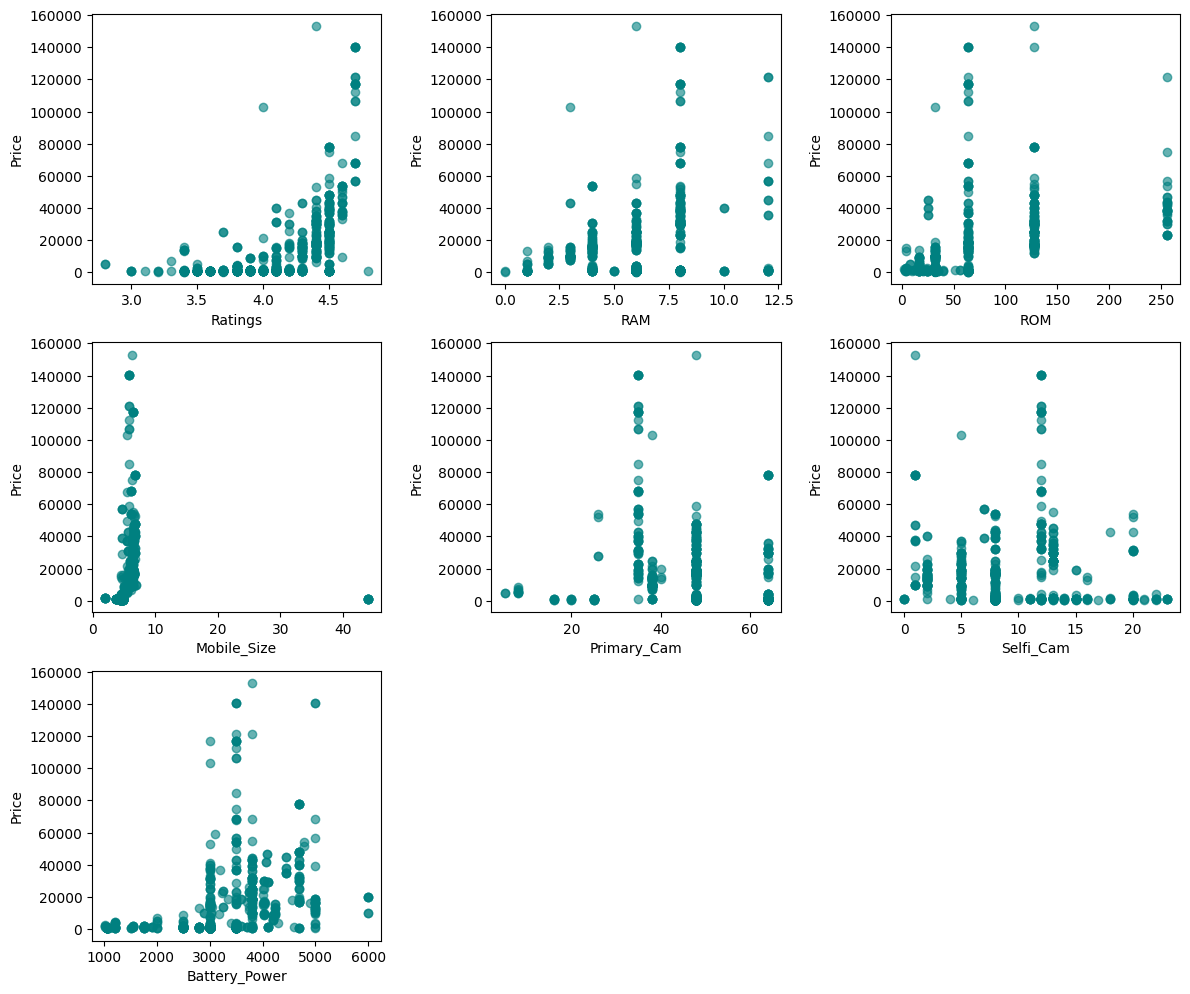

In [23]:
# ### Plotting all features with target
# ===============================================
target = 'Price'
features = data.drop(columns=[target]).columns
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features[:9]):  # plot first 9 if many
    plt.subplot(3, 3, i+1)
    plt.scatter(data[feature], data[target], color='teal', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [26]:
# ### Splitting final X and y
# ===============================================
X = data.drop(columns=['Price']).values
y = data['Price'].values.reshape(-1, 1)

In [43]:
# ### Doing train/test split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test  shape:", y_test.shape)


X_train shape: (645, 7)
X_test  shape: (162, 7)
y_train shape: (645, 1)
y_test  shape: (162, 1)


In [44]:
# ### Addition of bias (intercept)
# ===============================================
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
print("X_train_b shape (with bias):", X_train_b.shape)
print("Parameter theta shape should be:", (X_train_b.shape[1], 1))

X_train_b shape (with bias): (645, 8)
Parameter theta shape should be: (8, 1)


In [30]:
# ### Finding theta and intercept value using closed form solution
# ===============================================
theta_closed = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
print("\nClosed-form Weights (Theta):\n", theta_closed.flatten())



Closed-form Weights (Theta):
 [-1.03323531e+05  2.64166083e+04  2.77761247e+03  7.31275132e+01
  1.21179968e+02 -4.67970646e+02  1.84005393e+02  2.35971980e+00]


In [31]:
# ### Predicting without standardization and regularization
# ===============================================
y_pred_closed = X_test_b @ theta_closed
mse, rmse, r2 = performance_metrics(y_test, y_pred_closed)
print(f"\nClosed Form (No Regularization) → MSE={mse:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}")




Closed Form (No Regularization) → MSE=239357657.4315, RMSE=15471.1880, R2=0.4332


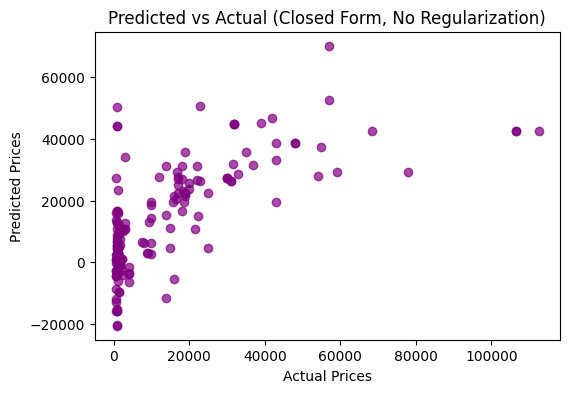

In [32]:
# ### Predicted vs Actual Plot
# ===============================================
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_closed, color='purple', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (Closed Form, No Regularization)")
plt.show()


In [33]:
# ### L2 Regularization without Standardization
# ===============================================
def ridge_closed_form(X, y, lam):
    n = X.shape[1]
    I = np.eye(n)
    I[0, 0] = 0  # Don't regularize bias
    theta = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return theta

lambdas = [0.01, 0.1, 1, 10, 100]
ridge_results = {}

for lam in lambdas:
    theta_ridge = ridge_closed_form(X_train_b, y_train, lam)
    y_pred_ridge = X_test_b @ theta_ridge
    mse, rmse, r2 = performance_metrics(y_test, y_pred_ridge)
    ridge_results[lam] = r2

print("\nR2 Scores (No Standardization):", ridge_results)


R2 Scores (No Standardization): {0.01: 0.4332383928165784, 0.1: 0.4333300758447858, 1: 0.434189674455836, 10: 0.4383973844779665, 100: 0.4022055470633785}


In [34]:
# ### L2 Regularization with Standardization
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

ridge_results_std = {}
for lam in lambdas:
    theta_ridge_std = ridge_closed_form(X_train_scaled_b, y_train, lam)
    y_pred_ridge_std = X_test_scaled_b @ theta_ridge_std
    mse, rmse, r2 = performance_metrics(y_test, y_pred_ridge_std)
    ridge_results_std[lam] = r2

print("\nR2 Scores (With Standardization):", ridge_results_std)


R2 Scores (With Standardization): {0.01: 0.4332318793201483, 0.1: 0.4332655183002335, 1: 0.4336001903186314, 10: 0.43678102063009694, 100: 0.45634686636276556}


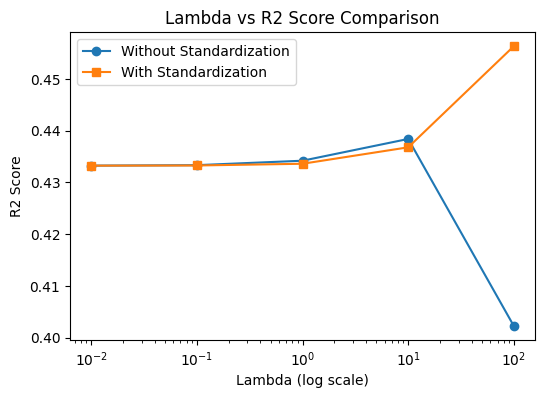

In [35]:
# ### Lambda vs R2 score plot
# ===============================================
plt.figure(figsize=(6,4))
plt.plot(list(ridge_results.keys()), list(ridge_results.values()), 'o-', label='Without Standardization')
plt.plot(list(ridge_results_std.keys()), list(ridge_results_std.values()), 's-', label='With Standardization')
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("R2 Score")
plt.title("Lambda vs R2 Score Comparison")
plt.legend()
plt.show()


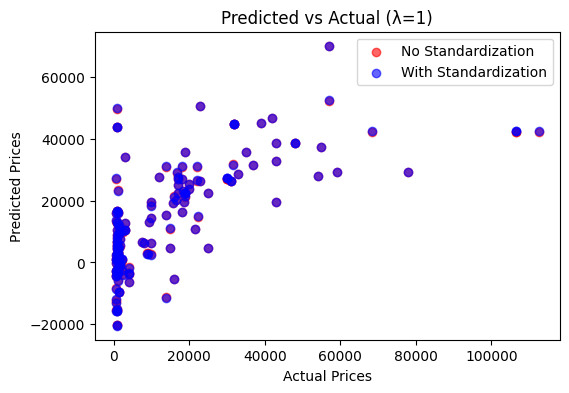

In [36]:
# ### Predicted vs actual plot for both with and without standardization
# ===============================================
best_lambda = 1
theta_no_std = ridge_closed_form(X_train_b, y_train, best_lambda)
y_pred_no_std = X_test_b @ theta_no_std
theta_std = ridge_closed_form(X_train_scaled_b, y_train, best_lambda)
y_pred_std = X_test_scaled_b @ theta_std

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_no_std, color='red', label='No Standardization', alpha=0.6)
plt.scatter(y_test, y_pred_std, color='blue', label='With Standardization', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (λ=1)")
plt.legend()
plt.show()

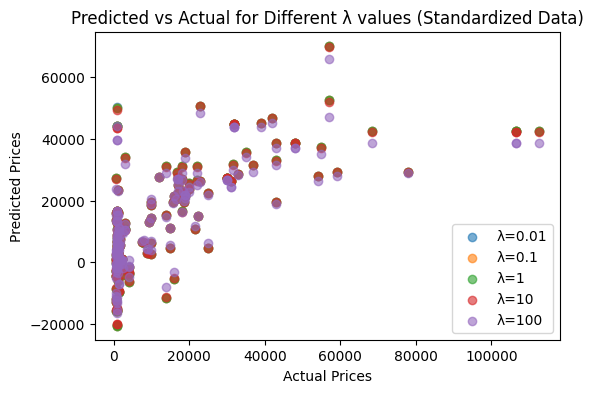

In [38]:
# ### Predicted vs actual plot for different lambda values
# ===============================================
plt.figure(figsize=(6,4))
for lam in lambdas:
    theta_r = ridge_closed_form(X_train_scaled_b, y_train, lam)
    y_pred_r = X_test_scaled_b @ theta_r
    plt.scatter(y_test, y_pred_r, label=f"λ={lam}", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual for Different λ values (Standardized Data)")
plt.legend()
plt.show()


Feature Importance from L2 Weights (λ=1):
          Feature        Weight
0           Bias  14287.049612
1        Ratings   9692.156085
2            RAM   5700.134255
3            ROM   3941.592734
7  Battery_Power   2208.697763
6      Selfi_Cam    828.568473
4    Mobile_Size    465.636685
5    Primary_Cam  -5286.525143


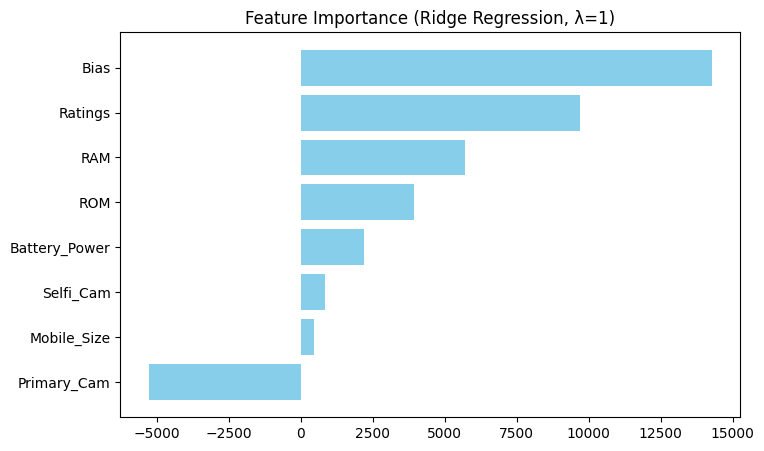

In [40]:
# ### Feature importance with l2 weights
# ===============================================
theta_final = ridge_closed_form(X_train_scaled_b, y_train, best_lambda)
feature_importance = pd.DataFrame({
    'Feature': ['Bias'] + list(data.drop(columns=['Price']).columns),
    'Weight': theta_final.flatten()
}).sort_values(by='Weight', ascending=False)

print("\nFeature Importance from L2 Weights (λ=1):\n", feature_importance)

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Weight'], color='skyblue')
plt.title("Feature Importance (Ridge Regression, λ=1)")
plt.gca().invert_yaxis()
plt.show()